<a href="https://colab.research.google.com/github/kadobkina/diplom/blob/master/%D0%B4%D0%B8%D0%BF%D0%BB%D0%BE%D0%BC_%D0%B8%D1%82%D0%BE%D0%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kadobkina","key":"dd8f943bddbccadf6be2b84dcb212ed7"}'}

In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d robinreni/signature-verification-dataset

 97% 583M/601M [00:03<00:00, 242MB/s]
100% 601M/601M [00:03<00:00, 167MB/s]


In [6]:
!unzip signature-verification-dataset.zip

Archive:  signature-verification-dataset.zip
  inflating: sign_data/sign_data/test/049/01_049.png  
  inflating: sign_data/sign_data/test/049/02_049.png  
  inflating: sign_data/sign_data/test/049/03_049.png  
  inflating: sign_data/sign_data/test/049/04_049.png  
  inflating: sign_data/sign_data/test/049/05_049.png  
  inflating: sign_data/sign_data/test/049/06_049.png  
  inflating: sign_data/sign_data/test/049/07_049.png  
  inflating: sign_data/sign_data/test/049/08_049.png  
  inflating: sign_data/sign_data/test/049/09_049.png  
  inflating: sign_data/sign_data/test/049/10_049.png  
  inflating: sign_data/sign_data/test/049/11_049.png  
  inflating: sign_data/sign_data/test/049/12_049.png  
  inflating: sign_data/sign_data/test/049_forg/01_0114049.PNG  
  inflating: sign_data/sign_data/test/049_forg/01_0206049.PNG  
  inflating: sign_data/sign_data/test/049_forg/01_0210049.PNG  
  inflating: sign_data/sign_data/test/049_forg/02_0114049.PNG  
  inflating: sign_data/sign_data/test/0

In [7]:
my_data_dir = '/content/sign_data'

In [8]:
os.listdir(my_data_dir) 

['train_data.csv', 'test', 'test_data.csv', 'train', 'sign_data']

In [9]:
!rm -rf '/content/sign_data/sign_data'

In [10]:
os.listdir(my_data_dir) 

['train_data.csv', 'test', 'test_data.csv', 'train']

In [11]:
test_path = my_data_dir+'/test/'
train_path = my_data_dir+'/train/'

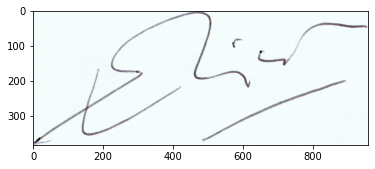

In [12]:
ex_sign = train_path+'/001/'+os.listdir(train_path+'//001')[1]
sign_img= imread(ex_sign)
plt.imshow(sign_img)

In [13]:
sign_img.shape

(383, 958, 3)

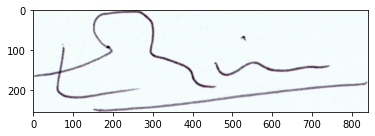

In [14]:
ex_sign_forg = train_path+'/001_forg/'+os.listdir(train_path+'//001_forg')[1]
sign_forg_img = imread(ex_sign_forg)
plt.imshow(sign_forg_img)

In [15]:
sign_forg_img.shape

(255, 841, 3)

In [16]:
new_folder = os.path.join(train_path, 'real')
os.makedirs(new_folder)

In [17]:
new_folder = os.path.join(train_path, 'forged')
os.makedirs(new_folder)

In [18]:
new_folder = os.path.join(test_path, 'real')
os.makedirs(new_folder)

In [19]:
new_folder = os.path.join(test_path, 'forged')
os.makedirs(new_folder)

In [21]:
#шум соли и перца
import os
import cv2
def salt_pepper_noisy(image):
    row,col,ch = image.shape
    s_vs_p = 0.5
    amount = 0.04
    out = np.copy(image)
    # Salt mode
    num_salt = np.ceil(amount * image.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    out[coords] = 1

     # Pepper mode
    num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    out[coords] = 0
    return out

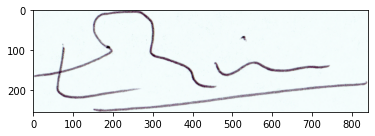

In [79]:
ss_path1 = train_path+'forged/001_forg/'+os.listdir(train_path+'//forged/001_forg')[2]
img1 = image.load_img(ss_path1)
plt.imshow(img1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


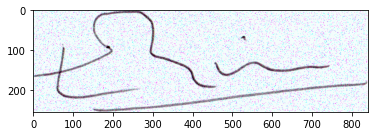

In [80]:
x1 = image.img_to_array(img1)
x1 /= 255
x1 = salt_pepper_noisy(x1)
plt.imshow(x1)
Image.fromarray((x1*255).astype('uint8'), 'RGB').save('/content/sign_data/train/forged/001_forg/'+os.listdir('/content/sign_data/train/forged/001_forg/')[1]+'_noise2.png') 

In [22]:
from PIL import Image
from tensorflow.keras.preprocessing import image
for folder_name in os.listdir(train_path):  
    if folder_name != 'real' and folder_name != 'forged':
        if 'forg' in folder_name:           
            os.system("cp -r {} /content/sign_data/train/forged".format(train_path+folder_name))     
            for i in range(1,6):
                imgn = salt_pepper_noisy(imread(train_path+folder_name+'/'+os.listdir(train_path+folder_name)[i]))
                Image.fromarray((imgn * 255).astype('uint8'), 'RGB').save('/content/sign_data/train/forged/'+folder_name+'/'+os.listdir(train_path+folder_name)[i]+'_noise.png')   
        else:    
            os.system("cp -r {} /content/sign_data/train/real".format(train_path+folder_name))
            for i in range(1,6):
                imgn = salt_pepper_noisy(imread(train_path+folder_name+'/'+os.listdir(train_path+folder_name)[i]))
                Image.fromarray((imgn * 255).astype('uint8'), 'RGB').save('/content/sign_data/train/real/'+folder_name+'/'+os.listdir(train_path+folder_name)[i]+'_noise.png')   

    if '0' in folder_name:   
        del_path = '/content/sign_data/train/' + folder_name
        os.system("rm -r {}".format(del_path))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


In [23]:
for folder_name in os.listdir(test_path):
    if folder_name != 'real' and folder_name != 'forged':
        if 'forg' in folder_name:           
            os.system("cp -r {} /content/sign_data/test/forged".format(test_path+folder_name))  
            for i in range(1,6):
                imgn = salt_pepper_noisy(imread(test_path+folder_name+'/'+os.listdir(test_path+folder_name)[i]))
                Image.fromarray((imgn * 255).astype('uint8'), 'RGB').save('/content/sign_data/test/forged/'+folder_name+'/'+os.listdir(test_path+folder_name)[i]+'_noise.png')        
        else:    
            os.system("cp -r {} /content/sign_data/test/real".format(test_path+folder_name))
            for i in range(1,6):
                imgn = salt_pepper_noisy(imread(test_path+folder_name+'/'+os.listdir(test_path+folder_name)[i]))
                Image.fromarray((imgn * 255).astype('uint8'), 'RGB').save('/content/sign_data/test/real/'+folder_name+'/'+os.listdir(test_path+folder_name)[i]+'_noise.png')   

    if '0' in folder_name:   
       del_path = '/content/sign_data/test/' + folder_name
       os.system("rm -r {}".format(del_path))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


In [24]:
dim1 = []
dim2 = []
for i in range(49, 70):
   for image_filename in os.listdir(train_path+'real/0'+str(i)):
      img = imread(train_path+'real/0'+str(i)+'/'+image_filename)
      d1,d2,colors = img.shape
      dim1.append(d1)
      dim2.append(d2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


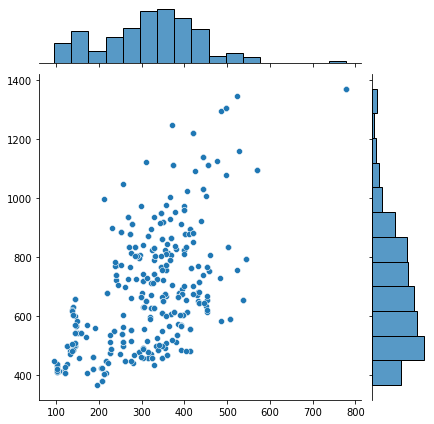

In [25]:
sns.jointplot(dim1,dim2)

In [26]:
np.mean(dim1)

317.5378151260504

In [27]:
np.mean(dim2)

685.1036414565826

In [28]:
image_shape = (100,200,3)

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [30]:
image_gen = ImageDataGenerator(rotation_range=15, # поворачивает изображение на 30 градусов
                               width_shift_range=0.2, # изменяет ширину изображения максимум на 10%
                               height_shift_range=0.2, # изменяет высоту изображения максимум на 10%
                               rescale=1/255, # нормализация изображения: пиксели в диапазоне от 0 до 1
                               shear_range=0.1, # отрезание части изображения максимум на 5%
                               zoom_range=0.1, # увеличение изображения максимум на 5%
                               horizontal_flip=True, # разрешение на горизонтальное переворачивание
                              )

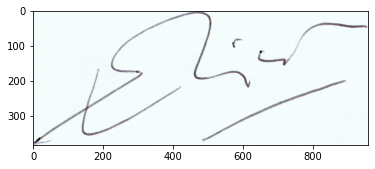

In [31]:
plt.imshow(sign_img)

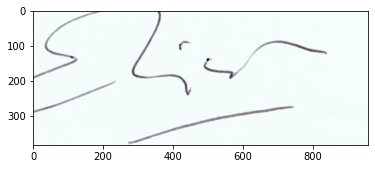

In [32]:
plt.imshow(image_gen.random_transform(sign_img))

In [33]:
image_gen.flow_from_directory(train_path)

Found 2289 images belonging to 2 classes.


In [34]:
image_gen.flow_from_directory(test_path)

Found 710 images belonging to 2 classes.


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=image_shape, activation='relu'))

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu'))

model.add(Flatten())
model.add(Dense(512, activation='relu'))

#model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 198, 16)       448       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 196, 32)       4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 98, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 96, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 282624)            0         
                                                                 
 dense (Dense)               (None, 512)               144704000 
                                                        

In [37]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=64,
                                               class_mode='binary')

Found 2289 images belonging to 2 classes.


In [38]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=64,
                                               class_mode='binary',
                                               shuffle=False)

Found 710 images belonging to 2 classes.


In [39]:
train_image_gen.class_indices

{'forged': 0, 'real': 1}

In [40]:
results = model.fit(train_image_gen,
                              epochs=20,
                              steps_per_epoch=train_image_gen.samples//train_image_gen.batch_size,
                              verbose=1)

Epoch 1/20
35/35 [==============================] - 31s 516ms/step - loss: 4.4379 - accuracy: 0.5160
Epoch 2/20
35/35 [==============================] - 18s 502ms/step - loss: 0.5408 - accuracy: 0.7101
Epoch 3/20
35/35 [==============================] - 18s 498ms/step - loss: 0.3974 - accuracy: 0.8427
Epoch 4/20
35/35 [==============================] - 18s 501ms/step - loss: 0.3368 - accuracy: 0.8764
Epoch 5/20
35/35 [==============================] - 18s 505ms/step - loss: 0.3000 - accuracy: 0.8903
Epoch 6/20
35/35 [==============================] - 18s 502ms/step - loss: 0.2623 - accuracy: 0.9065
Epoch 7/20
35/35 [==============================] - 17s 495ms/step - loss: 0.2414 - accuracy: 0.9083
Epoch 8/20
35/35 [==============================] - 17s 498ms/step - loss: 0.2373 - accuracy: 0.9146
Epoch 9/20
35/35 [==============================] - 17s 497ms/step - loss: 0.2153 - accuracy: 0.9213
Epoch 10/20
35/35 [==============================] - 18s 501ms/step - loss: 0.2112 - accura

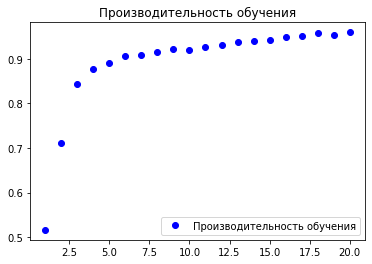

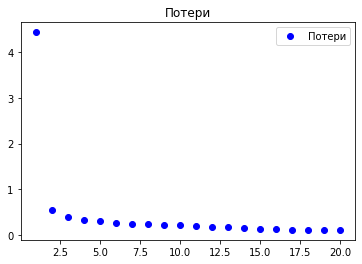

In [41]:
acc = results.history["accuracy"]

loss = results.history["loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Производительность обучения")

plt.title("Производительность обучения")

plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Потери")

plt.title("Потери")

plt.legend()

plt.show()

In [42]:
model.evaluate(test_image_gen)

12/12 [==============================] - 6s 474ms/step - loss: 0.1062 - accuracy: 0.9606


[0.10618489235639572, 0.9605633616447449]

In [67]:
check_forg = test_path+'forged/049_forg/'+os.listdir(test_path+'forged/049_forg')[0]
check_forg_img = imread(check_forg)
check_forg_img = image.img_to_array(check_forg_img)
type(check_forg_img)

numpy.ndarray

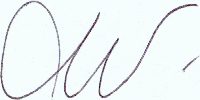

In [68]:
imgg = image.load_img(check_forg,target_size=image_shape)
imgg

In [69]:
x1 = image.img_to_array(imgg)
x1 /= 255
x1 = np.expand_dims(x1, axis=0)
model.predict(x1)

array([[5.133375e-11]], dtype=float32)

In [70]:
check_real = test_path+'/real/049/'+os.listdir(test_path+'/real/049')[0]
check_real_img = imread(check_real)
check_real_img = image.img_to_array(check_real_img)
type(check_real_img)

numpy.ndarray

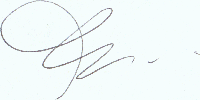

In [71]:
imgg2 = image.load_img(check_real,target_size=image_shape)
imgg2

In [72]:
x2 = image.img_to_array(imgg2)
x2 /= 255
x2 = np.expand_dims(x2, axis=0)
model.predict(x2)

array([[0.96811455]], dtype=float32)

In [73]:
check_forg = test_path+'forged/055_forg/'+os.listdir(test_path+'forged/055_forg')[0]
check_forg_img = imread(check_forg)
check_forg_img = image.img_to_array(check_forg_img)
type(check_forg_img)

numpy.ndarray

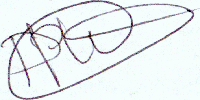

In [74]:
imgg = image.load_img(check_forg,target_size=image_shape)
imgg

In [75]:
x1 = image.img_to_array(imgg)
x1 /= 255
x1 = np.expand_dims(x1, axis=0)
model.predict(x1)

array([[4.519797e-18]], dtype=float32)

In [76]:
check_real = test_path+'/real/055/'+os.listdir(test_path+'/real/055')[0]
check_real_img = imread(check_real)
check_real_img = image.img_to_array(check_real_img)
type(check_real_img)

numpy.ndarray

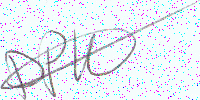

In [77]:
imgg2 = image.load_img(check_real,target_size=image_shape)
imgg2

In [78]:
x2 = image.img_to_array(imgg2)
x2 /= 255
x2 = np.expand_dims(x2, axis=0)
model.predict(x2)

array([[0.97560805]], dtype=float32)

In [81]:
from tensorflow.keras.preprocessing import image
pred_probabilities = model.predict_generator(test_image_gen)
predictions = pred_probabilities > 0.5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


In [82]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97       353
           1       0.94      1.00      0.97       357

    accuracy                           0.97       710
   macro avg       0.97      0.97      0.97       710
weighted avg       0.97      0.97      0.97       710



In [83]:
confusion_matrix(test_image_gen.classes,predictions)

array([[330,  23],
       [  0, 357]])

In [86]:
scores = model.evaluate(test_image_gen)

12/12 [==============================] - 7s 551ms/step - loss: 0.1023 - accuracy: 0.9606


In [87]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 96.0563
